### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [3]:
import pandas as pd

In [15]:
data = pd.read_csv('data.csv')

# Просмотр "сырых" данных
data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

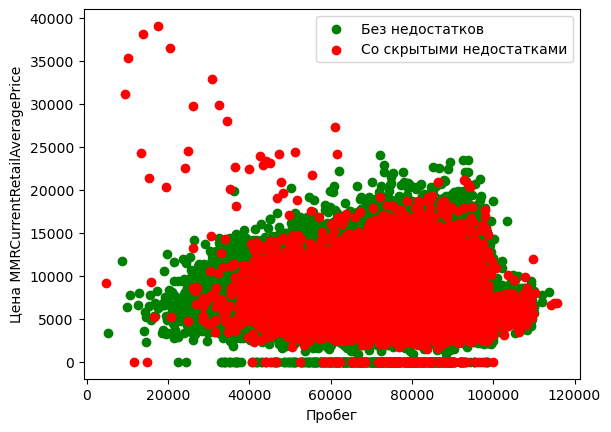

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
no_defects = data[data['IsBadBuy'] == 0]
defects = data[data['IsBadBuy'] == 1]

# Построение графика рассеяния
plt.scatter(no_defects['VehOdo'], no_defects['MMRCurrentRetailAveragePrice'], color='green', label='Без недостатков')
plt.scatter(defects['VehOdo'], defects['MMRCurrentRetailAveragePrice'], color='red', label='Со скрытыми недостатками')

# Настройка осей и меток
plt.xlabel('Пробег')
plt.ylabel('Цена MMRCurrentRetailAveragePrice')
plt.legend()

# Отображение графика
plt.show()

In [ ]:
# место для кода

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Выбор подмножества признаков
features = ['VehOdo', 'MMRCurrentRetailAveragePrice','IsBadBuy']
subset_data = data[features]

# Предварительная обработка данных (удаление пропущенных значений, масштабирование признаков и т.д.)

# Разделение данных на признаки (x) и целевую переменную (y)
x = subset_data.dropna().drop('IsBadBuy', axis=1)
y = subset_data.dropna()['IsBadBuy']

# Тренировка модели
model.fit(x, y)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [20]:
# место для кода
prediction = model.predict(x)
prediction

array([0.12473569, 0.13585101, 0.14563746, ..., 0.12108278, 0.12349799,
       0.07867021])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [23]:
# место для кода
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [30]:
# место для кода
from sklearn.metrics import classification_report, confusion_matrix

# Преобразование предсказаний в значения {0, 1}
threshold = 0.5  # Порог для классификации
predictionClass = [1 if pred > threshold else 0 for pred in prediction]

# Построение отчета по качеству классификации
classification_report = classification_report(y, predictionClass)
print("Classification Report:")
print(classification_report)

# Построение матрицы ошибок
confusion_matrix = confusion_matrix(y, predictionClass)
print("Confusion Matrix:")
print(confusion_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63724
           1       0.00      0.00      0.00      8944

    accuracy                           0.88     72668
   macro avg       0.44      0.50      0.47     72668
weighted avg       0.77      0.88      0.82     72668

Confusion Matrix:
[[63724     0]
 [ 8944     0]]


E:\Programms\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programms\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Programms\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [33]:
# место для кода
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Создание модели классификации "решающее дерево"
model = DecisionTreeClassifier(max_depth=20)

# Тренировка модели
model.fit(x, y)

# Предсказание
prediction = model.predict(x)

# Построение отчета по качеству классификации
classification_report = classification_report(y, prediction)
print("Classification Report:")
print(classification_report)

# Построение матрицы ошибок
confusion_matrix = confusion_matrix(y, prediction)
print("Confusion Matrix:")
print(confusion_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

Confusion Matrix:
[[63620   104]
 [ 6184  2760]]


## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [34]:
# место для кода
probabilities = model.predict_proba(x)

# Извлечение вероятностей для класса 1 (наличие скрываемых недостатков)
probabilities_defects = probabilities[:, 1]

# Вывод вероятностей
print("Probabilities of Hidden Defects:")
print(probabilities_defects)

Probabilities of Hidden Defects:
[0.10682196 0.         0.14189944 ... 0.10682196 0.13253012 0.06210526]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [39]:
# место для кода
prediction_linear = model.predict(x)
predictionClass_linear = [1 if p > 0.5 else 0 for p in prediction_linear]

# Generate predictions for Decision Tree
prediction_tree = model.predict(x)
predictionClass_tree = [1 if p > 0.5 else 0 for p in prediction_tree]

# Classification report and confusion matrix for Linear Regression
print("Linear Regression:")
print(metrics.classification_report(y, predictionClass_linear))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y, predictionClass_linear))

# Classification report and confusion matrix for Decision Tree
print("Decision Tree:")
print(metrics.classification_report(y, predictionClass_tree))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y, predictionClass_tree))

Linear Regression:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

Confusion Matrix:
[[63620   104]
 [ 6184  2760]]
Decision Tree:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

Confusion Matrix:
[[63620   104]
 [ 6184  2760]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [40]:
# место для кода
dataTrain = data.loc[0:34999]
dataTest = data.loc[35000:69999]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [47]:
# Разделение данных на признаки (x) и целевую переменную (y) для dataTrain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (x) и целевую переменную (y) для dataTrain
x_train = dataTrain.drop('IsBadBuy', axis=1)
y_train = dataTrain['IsBadBuy']

# Разделение данных на признаки (x) и целевую переменную (y) для dataTest
x_test = dataTest.drop('IsBadBuy', axis=1)
y_test = dataTest['IsBadBuy']

# Список глубин дерева для эксперимента
depths = [5, 10, 15, 20, 25]

# Проход по различным глубинам дерева
for depth in depths:
    # Создание и тренировка модели решающего дерева
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)

    # Предсказание на тренировочном наборе данных
    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Предсказание на тестовом наборе данных
    y_test_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Вывод точности предсказания для каждой глубины
    print(f"Depth: {depth} | Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")

TypeError: float() argument must be a string or a number, not 'Timestamp'

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [49]:
# место для кода
data=pd.read_csv('data.csv')
data.dropna(inplace=True)
X = data[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = data['IsBadBuy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

# Получение предсказаний на тестовых данных и преобразование в бинарные метки
tree_preds = tree.predict(X_test)
features=['VehOdo', 'MMRCurrentRetailAveragePrice']
y_pred_train = tree.predict(data[features])
import numpy as np

loss = np.mean((data['IsBadBuy'] == 0) * 1000 * (y_pred_train == 1) + 
               (data['IsBadBuy'] == 1) * 100 * (y_pred_train == 0))
print(loss)

5.0366300366300365


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [50]:
# место для кода
import numpy as np

# Получение предсказаний на обучающей выборке
y_pred_train = tree.predict(X_train)

# Функция потерь
loss = np.mean((y_train == 0) * 1000 * (y_pred_train == 1) + 
               (y_train == 1) * 100 * (y_pred_train == 0))

print(f"Loss on Training Set: {loss:.2f}")

Loss on Training Set: 0.04
